In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
def_color=sns.color_palette()[0]
from sklearn.model_selection import train_test_split

In [2]:
# to generate a detailed summary report of the input data's variables, including their data types, 
# number of levels, minimum and maximum lengths of string values.
def describe_more(df,normalize_ind=False, weight_column=None, skip_columns=[], dropna=True):
    var = [] ; l = [] ; t = []; unq =[]; min_l = []; max_l = [];
    assert isinstance(skip_columns, list), "Argument skip_columns should be list"
    if weight_column is not None:
        if weight_column not in list(df.columns):
            raise AssertionError('weight_column is not a valid column name in the input DataFrame')
      
    for x in df:
        if x in skip_columns:
            pass
        else:
            var.append( x )
            uniq_counts = len(pd.value_counts(df[x],dropna=dropna))
            uniq_counts = len(pd.value_counts(df[x], dropna=dropna)[pd.value_counts(df[x],dropna=dropna)>0])
            l.append(uniq_counts)
            t.append( df[ x ].dtypes )
            min_l.append(df[x].apply(str).str.len().min())
            max_l.append(df[x].apply(str).str.len().max())
            if weight_column is not None and x not in skip_columns:
                df2 = df.groupby(x).agg({weight_column: 'sum'}).sort_values(weight_column, ascending=False)
                df2['authtrans_vts_cnt']=((df2[weight_column])/df2[weight_column].sum()).round(2)
                unq.append(df2.head(n=100).to_dict()[weight_column])
            else:
                df_cat_d = df[x].value_counts(normalize=normalize_ind,dropna=dropna).round(decimals=2)
                df_cat_d = df_cat_d[df_cat_d>0]
                #unq.append(df[x].value_counts().iloc[0:100].to_dict())
                unq.append(df_cat_d.iloc[0:100].to_dict())
            
    levels = pd.DataFrame( { 'A_Variable' : var , 'Levels' : l , 'Datatype' : t ,
                             'Min Length' : min_l,
                             'Max Length': max_l,
                             'Level_Values' : unq} )
    #levels.sort_values( by = 'Levels' , inplace = True )
    return levels

In [3]:
# Read the data and collect the general info about it
abnb=pd.read_csv('Airbnb_Open_Data.csv')
describe_more(abnb)

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\2313612732.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  abnb=pd.read_csv('Airbnb_Open_Data.csv')


,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,id,102058,int64,7,8,"{6044940: 2, 6067584: 2, 6077525: 2, 6076973: ..."
1,NAME,61281,object,1,248,"{'Home away from home': 33, 'Hillside Hotel': ..."
2,host id,102057,int64,9,11,"{38729751923: 2, 3895711649: 2, 43698780331: 2..."
3,host_identity_verified,2,object,3,11,"{'unconfirmed': 51200, 'verified': 51110}"
4,host name,13190,object,1,35,"{'Michael': 881, 'David': 764, 'John': 581, 'A..."
5,neighbourhood group,7,object,3,13,"{'Manhattan': 43792, 'Brooklyn': 41842, 'Queen..."
6,neighbourhood,224,object,3,26,"{'Bedford-Stuyvesant': 7937, 'Williamsburg': 7..."
7,lat,21991,float64,3,11,"{40.76411: 36, 40.71813: 32, 40.76125: 28, 40...."
8,long,17774,float64,3,12,"{-73.99371: 44, -73.9535: 40, -73.95427: 37, -..."
9,country,1,object,3,13,{'United States': 102067}


In [4]:
abnb.shape

(102599, 26)

In [5]:
abnb.describe()

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,1.625751e+07,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [6]:
abnb.isnull().sum()

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [7]:
#Some of the observations: 1. Minimum nights has a minimum value <0 which does not make sense, 
# 2.License field has a no values in it. hence will be dropping the column
# 3.availability_365 has a negative value which again doesnt make sense.

In [8]:
abnb.head(5)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [9]:
# The Data Cleaning
# Replacing empty spaces and changing string type
abnb.columns = abnb.columns.str.replace(' ', '_')
abnb.columns = abnb.columns.str.lower()

In [10]:
# selecting rows  where minimum_nights <0 for new data frame
abnb1 = abnb[abnb.loc[:,'minimum_nights'] < 0]

In [11]:
# replace all the values in minimum_nights column where the values are less than zero with zero
abnb1.loc[:,'minimum_nights']=0
(abnb[abnb.loc[:,'minimum_nights'] < 0])=abnb1

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\303676434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb1.loc[:,'minimum_nights']=0


In [12]:
abnb['minimum_nights']

0         10.0
1         30.0
2          3.0
3         30.0
4         10.0
          ... 
102594     1.0
102595     1.0
102596     3.0
102597     2.0
102598     1.0
Name: minimum_nights, Length: 102599, dtype: float64

In [13]:
# selecting rows  where availability <0 for new data frame
# replace all the values in availability column where the values are less than zero with zero
abnb1 = abnb[abnb.loc[:,'availability_365'] < 0]
abnb1.loc[:,'availability_365']=0
(abnb[abnb.loc[:,'availability_365'] < 0])=abnb1

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\4030287811.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb1.loc[:,'availability_365']=0


In [14]:
abnb['availability_365']

0         286.0
1         228.0
2         352.0
3         322.0
4         289.0
          ...  
102594    227.0
102595    395.0
102596    342.0
102597    386.0
102598     69.0
Name: availability_365, Length: 102599, dtype: float64

In [15]:
# Coverting construction_year datatype to numeric
abnb['construction_year']=pd.to_numeric(abnb['construction_year'], errors='coerce')

In [16]:
# Drop the license column
abnb=abnb.drop(columns=['license'])

In [17]:
# Replacing the dollar sign and commas with an empty string. 
abnb.price = abnb.price.str.replace('$','')
abnb.price = abnb.price.str.replace(',','')

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\2586023009.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  abnb.price = abnb.price.str.replace('$','')


In [18]:
# If the column service_fee is in string format and contains dollar signs, it would make sense to replace them with an empty string to remove them.
abnb.service_fee = abnb.service_fee.str.replace('$','')

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\1156624820.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  abnb.service_fee = abnb.service_fee.str.replace('$','')


In [19]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   name                            102349 non-null  object 
 2   host_id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102193 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [20]:
# creating 2 lists with datatypes object and the other with type other than object
catVar=[x for x in abnb.columns if abnb[x].dtype=='object']
numVar=[x for x in abnb.columns if abnb[x].dtype!='object']

In [21]:
abnb.isnull().sum().sort_values()

id                                    0
room_type                             0
host_id                               0
long                                  8
lat                                   8
neighbourhood                        16
neighbourhood_group                  29
cancellation_policy                  76
instant_bookable                    105
country_code                        131
number_of_reviews                   183
construction_year                   214
price                               247
name                                250
service_fee                         273
host_identity_verified              289
calculated_host_listings_count      319
review_rate_number                  326
host_name                           406
minimum_nights                      409
availability_365                    448
country                             532
reviews_per_month                 15879
last_review                       15893
house_rules                       52131


In [22]:
abnb1=abnb[abnb.loc[:,'lat'].isnull()]

In [23]:
abnb1=abnb[abnb.loc[:,'long'].isnull()]

In [24]:
abnb1.head(4)

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules
779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,unconfirmed,Gibson,Brooklyn,Crown Heights,NaN,NaN,United States,...,539,108,1.0,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...
785,1434892,Authentic NY Charming Artist Loft,66486085219,unconfirmed,Bailey,Brooklyn,Greenpoint,NaN,NaN,United States,...,1058,212,5.0,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...
799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,United States,...,506,101,6.0,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...
814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,United States,...,381,76,20.0,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ..."


In [25]:
# Using the KNN imputer fill the Longitude and Latitude missing values , as the region is New York
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
abnb[['long', 'lat']] = imputer.fit_transform(abnb[['long', 'lat']])

In [26]:
# encodes the number of days between the last review date and a reference date. The reference date can be the 
# earliest or latest review date in your dataset
abnb['last_review'] = pd.to_datetime(abnb['last_review'])
ref_date = abnb['last_review'].max()  # Use the latest review date as the reference date
abnb['last_review'] = (ref_date - abnb['last_review']).dt.days

In [27]:
# performing mean imputation on the 'last_review' column of the 'abnb' dataset using 
# the SimpleImputer function from the scikit-learn library
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy='mean')
abnb[['last_review']] = im.fit_transform(abnb[['last_review']])

In [28]:
# performing mean imputation on the 'service_fee' column
abnb[['service_fee']] = im.fit_transform(abnb[['service_fee']])

In [29]:
# dropping rows of zero values from neighbourhood,neighbourhood_group and cancellation_policy columns 
abnb=abnb.dropna(subset=['neighbourhood'])
abnb=abnb.dropna(subset=['neighbourhood_group'])
abnb=abnb.dropna(subset=['cancellation_policy'])

In [30]:
# Dropping columns country and country_code
abnb=abnb.drop(columns=['country','country_code'])

In [31]:
# Dropping columns name and host_name
abnb=abnb.drop(columns=['name','host_name'])

In [32]:
# count of missing values in each column
abnb.isnull().sum().sort_values()

id                                    0
host_id                               0
last_review                           0
neighbourhood_group                   0
neighbourhood                         0
lat                                   0
long                                  0
cancellation_policy                   0
room_type                             0
service_fee                           0
instant_bookable                     29
number_of_reviews                   183
construction_year                   200
price                               241
host_identity_verified              278
calculated_host_listings_count      319
review_rate_number                  324
minimum_nights                      407
availability_365                    429
reviews_per_month                 15871
house_rules                       52085
dtype: int64

In [33]:
# Applying KNN imputation on Instant Bookability
from sklearn.impute import KNNImputer
imputer_new = KNNImputer(n_neighbors=3)
abnb[['instant_bookable']] = imputer_new.fit_transform(abnb[['instant_bookable']])

In [34]:
# fill the missing values with zero in availabilty column
abnb.availability_365 =abnb.availability_365.fillna(0.0).astype(int)

In [35]:
# fill the missing values with zero in reviews_per_month and number_of_reviews column
abnb.reviews_per_month =abnb.reviews_per_month.fillna(0.0).astype(int)
abnb.number_of_reviews =abnb.number_of_reviews.fillna(0.0).astype(int)

In [36]:
# KNN imputation is applied on construction_year 
abnb[['construction_year']] = imputer.fit_transform(abnb[['construction_year']])

In [37]:
# drop rows with null values in price column
abnb=abnb.dropna(subset=['price'])

In [38]:
# replacing null values with string 'unconfirmed' in column host_identity_verified 
abnb.loc[abnb['host_identity_verified'].isnull(), 'host_identity_verified'] = 'unconfirmed'

In [39]:
# drop all rows with null values in column house_rules
abnb=abnb.dropna(subset=['house_rules'])

In [40]:
# drop duplicatesfrom the dataset 
abnb.drop_duplicates(inplace=True)

In [41]:
# fill the null values in minimum_nights with zero values
abnb.minimum_nights = abnb.minimum_nights.fillna(0.0).astype(int)

In [42]:
# selects the 'review_rate_number'and calculated_host_listings_count columns of the abnb DataFrame, to fill missing values with the mean value, and transform the columns in place with the filled values.
abnb[['review_rate_number']] = im.fit_transform(abnb[['review_rate_number']])
abnb[['calculated_host_listings_count']] = im.fit_transform(abnb[['calculated_host_listings_count']])

In [43]:
# sorting values according to count of null values in each column
abnb.isnull().sum().sort_values()

id                                0
calculated_host_listings_count    0
review_rate_number                0
reviews_per_month                 0
last_review                       0
number_of_reviews                 0
minimum_nights                    0
service_fee                       0
price                             0
availability_365                  0
construction_year                 0
cancellation_policy               0
instant_bookable                  0
long                              0
lat                               0
neighbourhood                     0
neighbourhood_group               0
host_identity_verified            0
host_id                           0
room_type                         0
house_rules                       0
dtype: int64

In [44]:
# drop column 'house_rules'
abnb=abnb.drop(columns=['house_rules'])

In [45]:
# drop column 'id'
abnb=abnb.drop(columns=['id'])

C:\Users\rohit\AppData\Local\Temp\ipykernel_16796\3120594772.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


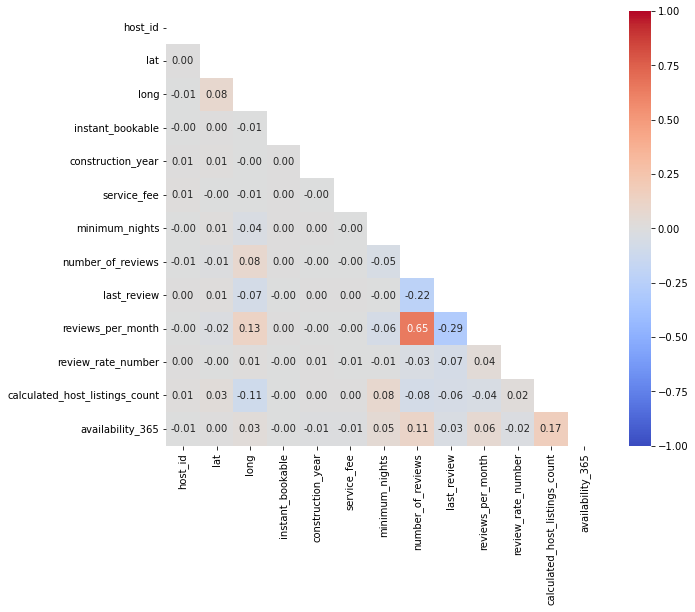

In [46]:
# creating a correlation matrix for all the numerical columns in the abnb dataset
corr = abnb.corr()
# visualizing the correlation matrix using a heatmap.
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0, square=True, annot=True, fmt='.2f')
plt.show()

In [47]:
# there is a high correlation between number of reviews and reviews per month. Hence adding the interaction term
abnb['reviews']=abnb['number_of_reviews']*abnb['reviews_per_month']

In [48]:
# encoding the categorical values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
abnb['host_identity_verified'] = le.fit_transform(abnb['host_identity_verified'])

In [49]:
abnb.head(3)

,host_id,host_identity_verified,neighbourhood_group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,reviews
0,80014485718,0,Brooklyn,Kensington,40.64749,-73.97237,0.0,strict,Private room,2020.0,966,193.0,10,9,13389.00000,0,4.0,6.0,286,0
1,52335172823,1,Manhattan,Midtown,40.75362,-73.98377,0.0,moderate,Entire home/apt,2007.0,142,28.0,30,45,13175.00000,0,4.0,2.0,228,0
2,78829239556,0,Manhattan,Harlem,40.80902,-73.94190,1.0,flexible,Private room,2005.0,620,124.0,3,0,14248.84662,0,5.0,1.0,352,0


In [50]:
# coverting data type from string to float data type
abnb['price'] = abnb['price'].astype(float)

In [51]:
describe_more(abnb)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,host_id,50037,int64,9,11,"{80014485718: 1, 21393740553: 1, 9646738813: 1..."
1,host_identity_verified,2,int32,1,1,"{1: 25038, 0: 24999}"
2,neighbourhood_group,5,object,5,13,"{'Manhattan': 21935, 'Brooklyn': 20604, 'Queen..."
3,neighbourhood,219,object,4,26,"{'Williamsburg': 3955, 'Bedford-Stuyvesant': 3..."
4,lat,16081,float64,4,18,"{40.76383: 18, 40.68537: 18, 40.69467: 18, 40...."
5,long,12653,float64,5,18,"{-73.94791: 24, -73.99229: 22, -73.94856: 22, ..."
6,instant_bookable,3,float64,3,19,"{0.0: 25077, 1.0: 24937, 0.49780384960762114: 23}"
7,cancellation_policy,3,object,6,8,"{'moderate': 16815, 'strict': 16712, 'flexible..."
8,room_type,3,object,11,15,"{'Entire home/apt': 25435, 'Private room': 234..."
9,construction_year,21,float64,6,18,"{2015.0: 2599, 2009.0: 2585, 2019.0: 2582, 200..."


### VISUALISATIONS

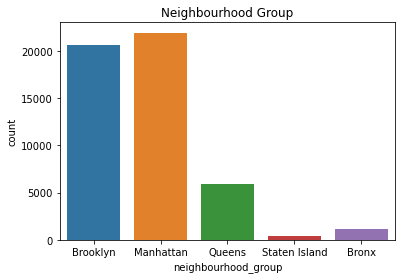

In [52]:
# insights on column 'Neighbourhood Group' using a bar graph
sns.countplot(x=abnb['neighbourhood_group'])
plt.title('Neighbourhood Group')
plt.show()

In [53]:
# map to identify the number of listings based on latitude and longitude
import folium
lat_mean = abnb['lat'].mean()
long_mean = abnb['long'].mean()
area_lat = abnb['lat'].groupby(abnb['calculated_host_listings_count']).mean()
area_long = abnb['long'].groupby(abnb['calculated_host_listings_count']).mean()
area_lat_long= pd.concat([area_lat,area_long],axis=1)
area_lat_long = area_lat_long.values.tolist()
map = folium.Map(
                  # Center the map here
                  location=[lat_mean,long_mean],
                  zoom_start = 10
                )  
for point in range(0, len(area_lat_long)):
  _=folium.Marker(
                      area_lat_long[point],
                      popup = area_lat_long[point]
                      ).add_to(map)
map

In [54]:
lat_mean = abnb['lat'].mean()
long_mean = abnb['long'].mean()
area_lat = abnb['lat'].groupby(abnb['neighbourhood_group']).mean()
area_long = abnb['long'].groupby(abnb['neighbourhood_group']).mean()
area_lat_long= pd.concat([area_lat,area_long],axis=1)
area_lat_long = area_lat_long.values.tolist()
map = folium.Map(
                  # Center the map here
                  location=[lat_mean,long_mean],
                  zoom_start = 10
                )  
for point in range(0, len(area_lat_long)):
  _=folium.Marker(
                      area_lat_long[point],
                      popup = area_lat_long[point]
                      ).add_to(map)
map

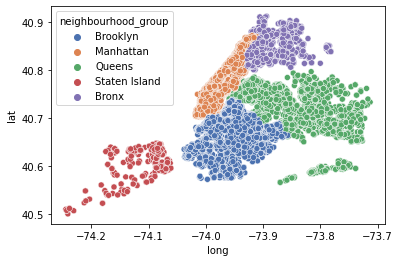

In [55]:
# Map of Neighbourhood group
sns.scatterplot(x = abnb['long'], y = abnb['lat'], hue=abnb['neighbourhood_group'], palette='deep')
plt.show()

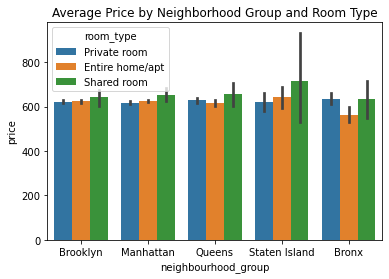

In [56]:
# visualizing the 'neighbourhood_group' column based on 'room_type' column vs 'price' column 
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = abnb)
plt.title('Average Price by Neighborhood Group and Room Type')
plt.show()

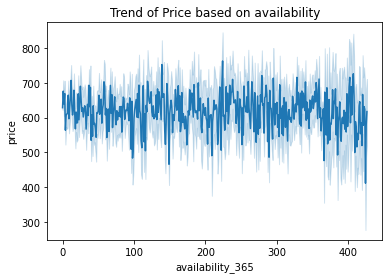

In [57]:
# lineplot of 'availability_365' vs 'price' column values
sns.lineplot(x = abnb['availability_365'], y = abnb['price'])
plt.title('Trend of Price based on availability')
plt.show()

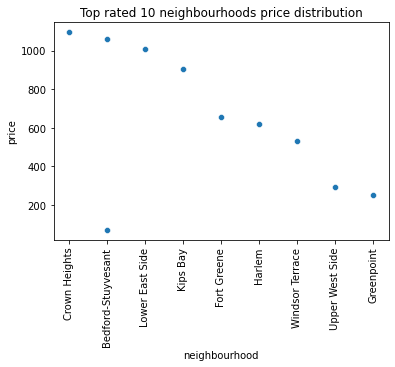

In [58]:
# Top rated 10 neighbourhoods price distribution 
# scatter plot of 'neighbourhood' column vs price
top_rated = abnb[abnb['review_rate_number'] == 5.0].head(10)
sns.scatterplot(x = "neighbourhood", y = 'price', data = top_rated.sort_values('price', ascending=False))
plt.xticks(rotation=90)
plt.title("Top rated 10 neighbourhoods price distribution")
plt.show()

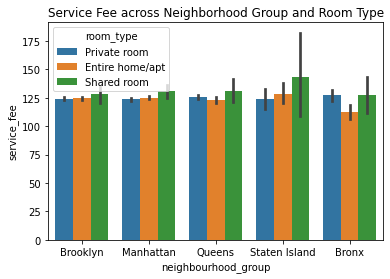

In [59]:
# visualizing the 'neighbourhood_group' column based on 'room_type' column vs 'service_fee' column 
sns.barplot(x = "neighbourhood_group", y = "service_fee", hue = "room_type", data = abnb)
plt.title('Service Fee across Neighborhood Group and Room Type')
plt.show()

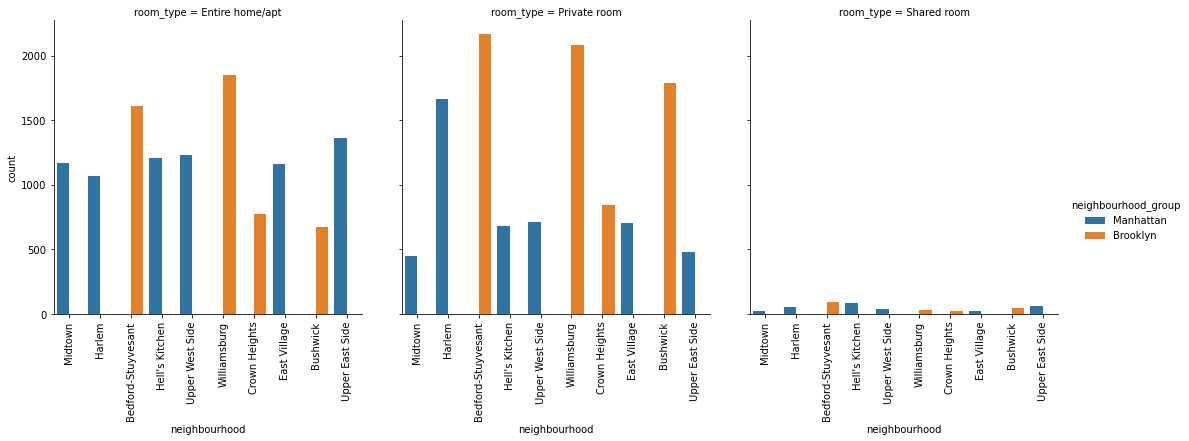

In [60]:
#top 10 neighbourhoods that have the most listings in them
temp = abnb['neighbourhood'].value_counts().head(10).index
#let's now combine this with our boroughs and room type for a rich visualization we can make

#subset of top 10 neighbourhoods
sub = abnb.loc[abnb['neighbourhood'].isin(temp)]

# catplot of 'neighbourhood' based on 'room_type' vs 'count'
top10 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub, kind='count')
top10.set_xticklabels(rotation=90)
plt.show()

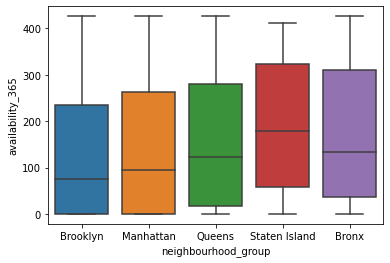

In [61]:
# box plot of 'neighbourhood_group' vs 'availability_365' columns
sns.boxplot(x='neighbourhood_group',y='availability_365', data=abnb)
plt.show()

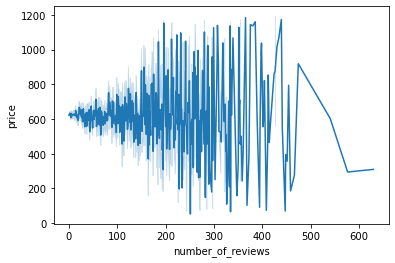

In [62]:
# lineplot of 'number_of_reviews' vs 'price' columns
sns.lineplot(x='number_of_reviews',y='price',data=abnb)
plt.show()

In [63]:
describe_more(abnb)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,host_id,50037,int64,9,11,"{80014485718: 1, 21393740553: 1, 9646738813: 1..."
1,host_identity_verified,2,int32,1,1,"{1: 25038, 0: 24999}"
2,neighbourhood_group,5,object,5,13,"{'Manhattan': 21935, 'Brooklyn': 20604, 'Queen..."
3,neighbourhood,219,object,4,26,"{'Williamsburg': 3955, 'Bedford-Stuyvesant': 3..."
4,lat,16081,float64,4,18,"{40.76383: 18, 40.68537: 18, 40.69467: 18, 40...."
5,long,12653,float64,5,18,"{-73.94791: 24, -73.99229: 22, -73.94856: 22, ..."
6,instant_bookable,3,float64,3,19,"{0.0: 25077, 1.0: 24937, 0.49780384960762114: 23}"
7,cancellation_policy,3,object,6,8,"{'moderate': 16815, 'strict': 16712, 'flexible..."
8,room_type,3,object,11,15,"{'Entire home/apt': 25435, 'Private room': 234..."
9,construction_year,21,float64,6,18,"{2015.0: 2599, 2009.0: 2585, 2019.0: 2582, 200..."


In [64]:
abnb['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'East Harlem', 'Murray Hill',
       'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side',
       'West Village', 'Williamsburg', 'Fort Greene', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'South Slope', 'Long Island City', 'Kips Bay', 'SoHo',
       'Upper East Side', 'Prospect Heights', 'Clinton Hill',
       'Carroll Gardens', 'Washington Heights', 'Gowanus',
       'Prospect-Lefferts Gardens', 'Flatlands', 'Flushing', 'DUMBO',
       'St. George', 'Highbridge', 'Financial District', 'Ridgewood',
       'Chelsea', 'Jamaica', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Chinatown',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Astoria', 'Clason Point', 'Morningside Heights',
       'Kingsbridge', 'Boerum Hill', 'Brooklyn Heights', 'Rockaway Beach',
   

In [65]:
# splitting the columns into categorical or numeric groups
numerical_cols=[]
ohe_cols=[]
for col in abnb.drop(columns=['price']).columns:
    if pd.api.types.is_numeric_dtype(abnb[col].dtype):
        print('Column to process:', col)
        numerical_cols.append(col)
    else:
        if abnb[col].nunique()<10:
            ohe_cols.append(col)
            print('Dummy Columns:', col)

Column to process: host_id
Column to process: host_identity_verified
Dummy Columns: neighbourhood_group
Column to process: lat
Column to process: long
Column to process: instant_bookable
Dummy Columns: cancellation_policy
Dummy Columns: room_type
Column to process: construction_year
Column to process: service_fee
Column to process: minimum_nights
Column to process: number_of_reviews
Column to process: last_review
Column to process: reviews_per_month
Column to process: review_rate_number
Column to process: calculated_host_listings_count
Column to process: availability_365
Column to process: reviews


# splitting the data into train,test and valid

In [66]:
# Train test valid split before encoding is performed. This is done before encoding to avoid data leakage.
from sklearn.model_selection import train_test_split

X = abnb.drop(columns=['price'])
Y = abnb['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [67]:
X_train.columns

Index(['host_id', 'host_identity_verified', 'neighbourhood_group',
       'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room_type', 'construction_year', 'service_fee',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365', 'reviews'],
      dtype='object')

In [68]:
 #Perform one-hot encoding
ohe_columns=[]
for col in ohe_cols :
    one_hot_enc = pd.get_dummies(X_train[col], prefix=col)
    X_train = pd.concat([X_train, one_hot_enc], axis=1)
    one_hot_enc_val=pd.get_dummies(X_val[col], prefix=col)
    X_val = pd.concat([X_val, one_hot_enc_val], axis=1)
    one_hot_enc_tst=pd.get_dummies(X_test[col], prefix=col)
    X_test = pd.concat([X_test, one_hot_enc_tst], axis=1)
    ohe_columns.extend(one_hot_enc)

In [69]:
import category_encoders as ce

# The neighbourhood coloumn is Target Encoded

encoder = ce.TargetEncoder(cols=['neighbourhood'])
encoder.fit(X_train, y_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)
X_val_enc = encoder.transform(X_val)
X_train=X_train_enc
X_test=X_test_enc
X_val=X_val_enc

import category_encoders as ce

# The neighbourhood column is WoE Encoded
encoder = ce.WOEEncoder(cols=['neighbourhood'])
encoder.fit(X_train, y_train)
X_train_enc = encoder.transform(X_train)
X_test_enc = encoder.transform(X_test)
X_val_enc = encoder.transform(X_val)
X_train = X_train_enc
X_test = X_test_enc
X_val = X_val_enc


In [70]:
describe_more(X_train)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,host_id,30021,int64,9,11,"{83756686638: 1, 70923708222: 1, 5259853302: 1..."
1,host_identity_verified,2,int32,1,1,"{1: 15086, 0: 14935}"
2,neighbourhood_group,5,object,5,13,"{'Manhattan': 13183, 'Brooklyn': 12403, 'Queen..."
3,neighbourhood,213,float64,15,17,"{611.3635240839852: 2429, 614.1483704974271: 2..."
4,lat,13502,float64,4,18,"{40.71813: 14, 40.76625: 13, 40.67293: 12, 40...."
5,long,10857,float64,5,18,"{-73.9398: 18, -73.95419: 16, -73.95528: 15, -..."
6,instant_bookable,3,float64,3,19,"{1.0: 15014, 0.0: 14995, 0.49780384960762114: 12}"
7,cancellation_policy,3,object,6,8,"{'moderate': 10096, 'strict': 10084, 'flexible..."
8,room_type,3,object,11,15,"{'Entire home/apt': 15150, 'Private room': 141..."
9,construction_year,21,float64,6,18,"{2006.0: 1577, 2019.0: 1561, 2009.0: 1559, 202..."


In [71]:
X_train=X_train.drop(columns=['host_id','neighbourhood_group','cancellation_policy','room_type','service_fee'])
X_test=X_test.drop(columns=['host_id','neighbourhood_group','cancellation_policy','room_type','service_fee'])
X_val=X_val.drop(columns=['host_id','neighbourhood_group','cancellation_policy','room_type'])


In [72]:
X_train.head(5)

,host_identity_verified,neighbourhood,lat,long,instant_bookable,construction_year,minimum_nights,number_of_reviews,last_review,reviews_per_month,...,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
22163,1,620.678108,40.72571,-73.98789,1.0,2005.0,2,8,14259.00000,0,...,0,1,0,0,0,0,1,1,0,0
2513,0,624.548117,40.73104,-73.99957,1.0,2005.0,12,16,14337.00000,0,...,0,1,0,0,0,1,0,1,0,0
17343,1,614.069626,40.77386,-73.95348,1.0,2021.0,6,0,14248.84662,0,...,0,1,0,0,1,0,0,1,0,0
36069,0,614.148370,40.69180,-73.94341,0.0,2010.0,2,19,14289.00000,2,...,1,0,0,0,0,1,0,0,1,0
76142,1,614.148370,40.69264,-73.94267,0.0,2022.0,3,0,14248.84662,0,...,1,0,0,0,0,1,0,0,1,0


In [73]:
describe_more(X_train)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,host_identity_verified,2,int32,1,1,"{1: 15086, 0: 14935}"
1,neighbourhood,213,float64,15,17,"{611.3635240839852: 2429, 614.1483704974271: 2..."
2,lat,13502,float64,4,18,"{40.71813: 14, 40.76625: 13, 40.67293: 12, 40...."
3,long,10857,float64,5,18,"{-73.9398: 18, -73.95419: 16, -73.95528: 15, -..."
4,instant_bookable,3,float64,3,19,"{1.0: 15014, 0.0: 14995, 0.49780384960762114: 12}"
5,construction_year,21,float64,6,18,"{2006.0: 1577, 2019.0: 1561, 2009.0: 1559, 202..."
6,minimum_nights,93,int32,1,4,"{1: 7653, 2: 7208, 3: 4892, 30: 2297, 4: 2114,..."
7,number_of_reviews,324,int32,1,3,"{0: 5716, 1: 2995, 2: 2052, 3: 1590, 4: 1226, ..."
8,last_review,1530,float64,7,16,"{14248.8466196111: 5703, 14230.0: 835, 14238.0..."
9,reviews_per_month,16,int32,1,2,"{0: 19833, 1: 3975, 2: 2683, 3: 1691, 4: 961, ..."


In [74]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns

# You might need to convert the data frame to a numpy array for the vif function
X_train_np = X_train.to_numpy()

vif_data["VIF"] = [variance_inflation_factor(X_train_np, i) for i in range(X_train_np.shape[1])]

print(vif_data)


C:\Users\rohit\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                              feature       VIF
0              host_identity_verified  1.000713
1                       neighbourhood  1.033021
2                                 lat  2.766506
3                                long  2.660226
4                    instant_bookable  1.000506
5                   construction_year  1.001824
6                      minimum_nights  1.012051
7                   number_of_reviews  3.132069
8                         last_review  1.139966
9                   reviews_per_month  2.130904
10                 review_rate_number  1.012378
11     calculated_host_listings_count  1.096961
12                   availability_365  1.063975
13                            reviews  3.285707
14          neighbourhood_group_Bronx       inf
15       neighbourhood_group_Brooklyn       inf
16      neighbourhood_group_Manhattan       inf
17         neighbourhood_group_Queens       inf
18  neighbourhood_group_Staten Island       inf
19       cancellation_policy_flexible   

In [75]:
describe_more(X_train)

,A_Variable,Levels,Datatype,Min Length,Max Length,Level_Values
0,host_identity_verified,2,int32,1,1,"{1: 15086, 0: 14935}"
1,neighbourhood,213,float64,15,17,"{611.3635240839852: 2429, 614.1483704974271: 2..."
2,lat,13502,float64,4,18,"{40.71813: 14, 40.76625: 13, 40.67293: 12, 40...."
3,long,10857,float64,5,18,"{-73.9398: 18, -73.95419: 16, -73.95528: 15, -..."
4,instant_bookable,3,float64,3,19,"{1.0: 15014, 0.0: 14995, 0.49780384960762114: 12}"
5,construction_year,21,float64,6,18,"{2006.0: 1577, 2019.0: 1561, 2009.0: 1559, 202..."
6,minimum_nights,93,int32,1,4,"{1: 7653, 2: 7208, 3: 4892, 30: 2297, 4: 2114,..."
7,number_of_reviews,324,int32,1,3,"{0: 5716, 1: 2995, 2: 2052, 3: 1590, 4: 1226, ..."
8,last_review,1530,float64,7,16,"{14248.8466196111: 5703, 14230.0: 835, 14238.0..."
9,reviews_per_month,16,int32,1,2,"{0: 19833, 1: 3975, 2: 2683, 3: 1691, 4: 961, ..."


In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)

# Print the coefficients and intercept of the linear regression model
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")
# Make predictions on the train data
y_train_pred = regressor.predict(X_train)
# Make predictions on the test data
y_test_pred = regressor.predict(X_test)

# Calculate R-squared, Mean Squared Error, and Mean Absolute Error for the train data
r2_tr = r2_score(y_train, y_train_pred)
mse_tr = mean_squared_error(y_train, y_train_pred)
mae_tr = mean_absolute_error(y_train, y_train_pred)

# Calculate R-squared, Mean Squared Error, and Mean Absolute Error for the test data
r2 = r2_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)

Coefficients: [-1.45632091e+00  1.19976458e+00  1.32785549e+01  1.78591941e+01
 -4.52094328e+00 -2.38911648e-01 -6.27101091e-02 -3.62464420e-02
 -1.87800068e-03 -5.33757071e-01 -1.44781942e+00  6.74361431e-03
 -1.77285568e-02  4.57789275e-03 -9.53236699e+00  2.50339084e+00
  9.39066975e-01  1.86782572e-01  5.90312660e+00 -1.20696524e-01
  3.06948071e+00 -2.94878419e+00 -1.16921739e+01 -1.76964182e+01
  2.93885921e+01]
Intercept: 1186.9313520044477


In [77]:
# Print the coefficients for the test data
coef_dict=dict(zip(X_test.columns,regressor.coef_))
sorted_tuples = sorted(coef_dict.items(), key=lambda item: abs(item[1]), reverse=True)
for tup in sorted_tuples:
    print(tup[0]," column coeficient is ", round(tup[1],2))
print("R-squared on Test data:", regressor.score(X_test,y_test))

room_type_Shared room  column coeficient is  29.39
long  column coeficient is  17.86
room_type_Private room  column coeficient is  -17.7
lat  column coeficient is  13.28
room_type_Entire home/apt  column coeficient is  -11.69
neighbourhood_group_Bronx  column coeficient is  -9.53
neighbourhood_group_Staten Island  column coeficient is  5.9
instant_bookable  column coeficient is  -4.52
cancellation_policy_moderate  column coeficient is  3.07
cancellation_policy_strict  column coeficient is  -2.95
neighbourhood_group_Brooklyn  column coeficient is  2.5
host_identity_verified  column coeficient is  -1.46
review_rate_number  column coeficient is  -1.45
neighbourhood  column coeficient is  1.2
neighbourhood_group_Manhattan  column coeficient is  0.94
reviews_per_month  column coeficient is  -0.53
construction_year  column coeficient is  -0.24
neighbourhood_group_Queens  column coeficient is  0.19
cancellation_policy_flexible  column coeficient is  -0.12
minimum_nights  column coeficient is 

In [78]:
# On test data print the R-squared, Mean Squared Error, and Mean Absolute Error using f-strings On test data
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

R-squared: -0.0041
Mean Squared Error: 110108.6916
Mean Absolute Error: 286.6698


In [79]:
# On test data print the R-squared, Mean Squared Error, and Mean Absolute Error using f-strings On test data
print(f"R-squared: {r2_tr:.4f}")
print(f"Mean Squared Error: {mse_tr:.4f}")
print(f"Mean Absolute Error: {mae_tr:.4f}")

R-squared: 0.0086
Mean Squared Error: 109331.7836
Mean Absolute Error: 285.4882


Based on the linear regression results, the model shows a relatively low R-squared value of 0.0086, indicating that only a small portion of the variance in the target variable can be explained by the selected features. The R-squared value measures the goodness of fit of the model to the data, with higher values indicating a better fit. In this case, the low R-squared value suggests that the linear regression model may not be well-suited for capturing the underlying relationship between the features and the target variable.

Additionally, the mean squared error (MSE) value is 109331.7836, which represents the average squared difference between the predicted values and the actual values. A higher MSE value indicates larger prediction errors, further suggesting that the linear regression model may not be accurately capturing the patterns in the data.

The mean absolute error (MAE) value is 285.4882, which represents the average absolute difference between the predicted values and the actual values. This metric provides a measure of the average magnitude of the errors in the predictions. A lower MAE value indicates better accuracy, but the reported value suggests that the linear regression model is still associated with relatively large errors.

Considering these results, it is reasonable to explore alternative models such as decision trees and K-nearest neighbors (KNN) that may better capture the underlying patterns and relationships in the data. These models could potentially provide more accurate predictions and improved performance compared to the linear regression model.

# Decision tree Analysis To understand feature importance

In [80]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor().fit(X_train, y_train)
dtv = dtree.score(X_train,y_train)
dtv

1.0

In [81]:
dtree.feature_importances_

array([8.96774972e-03, 4.35826466e-02, 1.34366787e-01, 1.57173562e-01,
       1.01922165e-02, 9.24638022e-02, 6.04207833e-02, 8.04489022e-02,
       1.12458549e-01, 1.29403406e-02, 4.95079058e-02, 3.65620539e-02,
       1.07812364e-01, 3.66656286e-02, 4.34096754e-04, 2.96253921e-03,
       2.79776725e-03, 1.87841216e-03, 1.72687583e-05, 7.55786767e-03,
       9.98175385e-03, 7.96888620e-03, 9.49113245e-03, 1.03270450e-02,
       3.01993943e-03])

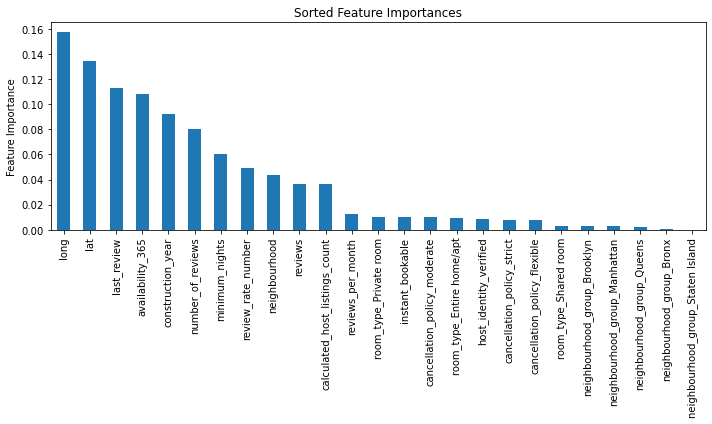

In [82]:
feature_names = X_train.columns
importances = dtree.feature_importances_

tree_importances = pd.Series(importances, index=feature_names)
tree_importances = tree_importances.sort_values(ascending=False)

#Plot the feature importance as a bar plot
fig, ax = plt.subplots(figsize=(10, 6))  # Increase the figsize as desired
tree_importances.plot.bar(ax=ax)
ax.set_title("Sorted Feature Importances")
ax.set_ylabel("Feature Importance")
fig.tight_layout()

# Show the plot
plt.show()


The important features in this dataset are longitude, latitude, last_review, availability_365 and construction_year.

We have identified several important features that significantly influence the prediction of price in the dataset. These features include:

Longitude and Latitude: The geographical coordinates of a property, represented by longitude and latitude, play a crucial role in determining its price. The location of a property is a key factor in real estate valuation. Certain areas or neighborhoods may have higher demand, better amenities, or desirable characteristics, leading to variations in property prices.

Last_review: The last_review feature represents the date of the most recent review for a listing. The timeliness of reviews can impact the perceived value of a property. Listings with more recent positive reviews may be seen as more attractive and reliable, potentially commanding higher prices.

Availability_365: This feature captures the number of days a listing is available for booking within a year. It reflects the availability and booking frequency of the property. Higher availability throughout the year suggests a property that is in demand and often booked, which can influence its price.

Construction_year: The construction_year feature indicates the year when the property was built. The age of a property is an important factor in real estate pricing. Newer constructions often come with modern amenities, updated features, and improved infrastructure, which can justify higher prices compared to older properties.

# K-Means Clustering

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# One-hot encoding for categorical variables
abnb_encoded = pd.get_dummies(abnb, columns=['neighbourhood_group', 'cancellation_policy', 'room_type'], drop_first=True)


# List of numeric columns
numeric_columns = ['lat', 'long', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'reviews']

# Scale numeric columns using StandardScaler
scaler = StandardScaler()
abnb_encoded[numeric_columns] = scaler.fit_transform(abnb_encoded[numeric_columns])


In [84]:
# Group by 'neighbourhood' and compute mean values for each group
abnb_grouped = abnb_encoded.groupby('neighbourhood').mean().reset_index()

In [85]:
# Determine the number of clusters (k) based on domain knowledge or by using techniques like the elbow method
k = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
abnb_grouped['cluster'] = kmeans.fit_predict(abnb_grouped[numeric_columns])

print(abnb_grouped.head())


   neighbourhood       host_id  host_identity_verified       lat      long  \
0       Allerton  5.293701e+10                0.414634  2.473303  1.962775   
1  Arden Heights  5.598598e+10                0.800000 -3.225965 -4.810478   
2       Arrochar  5.057115e+10                0.625000 -2.454299 -2.585954   
3        Arverne  5.153078e+10                0.558140 -2.480003  3.315745   
4        Astoria  4.846644e+10                0.523344  0.652649  0.665159   

   instant_bookable  construction_year     price  service_fee  minimum_nights  \
0          0.560976          -0.093558  0.080055     0.080608       -0.143172   
1          1.000000          -1.273710  0.692929     0.693059        0.005480   
2          0.541667           0.266301 -0.256860    -0.258233       -0.136984   
3          0.453488          -0.283739  0.092735     0.092020       -0.160357   
4          0.491857           0.041933  0.048065     0.046257       -0.023609   

   ...   reviews  neighbourhood_group_Brookl

C:\Users\rohit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


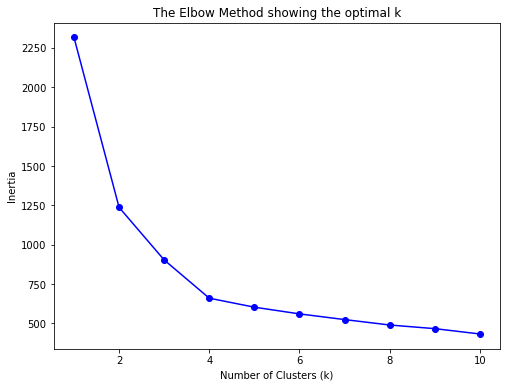

In [91]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create an empty list to store the inertia values
inertia = []

# Define the range of possible clusters
range_clusters = range(1, 11)

# Calculate inertia for different numbers of clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(abnb_grouped[numeric_columns])
    inertia.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range_clusters, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()


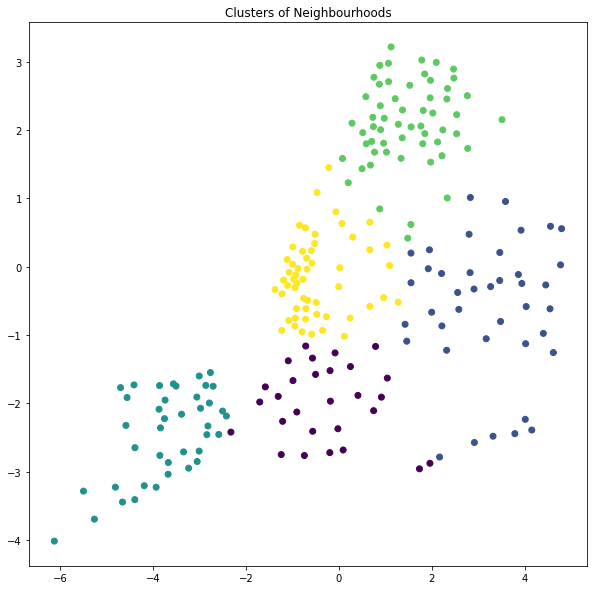

In [86]:
#
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(abnb_grouped['long'], abnb_grouped['lat'], c=abnb_grouped['cluster'])
plt.title('Clusters of Neighbourhoods')
plt.show()


In [87]:
cluster_characteristics = abnb_grouped.groupby('cluster').mean()
print(cluster_characteristics)


              host_id  host_identity_verified       lat      long  \
cluster                                                             
0        4.965256e+10                0.550413 -1.999467 -0.293127   
1        4.887031e+10                0.494031 -0.601546  3.192905   
2        4.865997e+10                0.458552 -2.446828 -3.705334   
3        4.812935e+10                0.489802  2.101063  1.471698   
4        4.944200e+10                0.498016 -0.155063 -0.463318   

         instant_bookable  construction_year     price  service_fee  \
cluster                                                               
0                0.552468           0.113212  0.050643     0.050492   
1                0.524717          -0.098525 -0.014382    -0.010800   
2                0.516212          -0.253449 -0.113448    -0.113667   
3                0.517067          -0.015648 -0.094493    -0.090600   
4                0.498069          -0.014068 -0.002175    -0.002276   

         minimum_n

In [88]:
cluster_price_trends = abnb_grouped.groupby('cluster')['price'].describe()
print(cluster_price_trends)

         count      mean       std       min       25%       50%       75%  \
cluster                                                                      
0         28.0  0.050643  0.449141 -1.332070 -0.071658  0.051254  0.167810   
1         40.0 -0.014382  0.331703 -0.639598 -0.152932 -0.049742  0.093882   
2         40.0 -0.113448  0.610317 -1.699594 -0.347859 -0.121298  0.233674   
3         57.0 -0.094493  0.396853 -1.520351 -0.271672 -0.017116  0.110738   
4         54.0 -0.002175  0.123506 -0.645824 -0.035575 -0.008087  0.047429   

              max  
cluster            
0        1.207463  
1        1.227546  
2        0.907218  
3        0.710579  
4        0.333299  


Cluster 0: The mean price for this cluster is approximately 0.051, which indicates that on average, prices in this cluster are higher than those in the other clusters, given that prices were standardized. The standard deviation (std) of 0.449 suggests a wider spread of prices in this cluster, which could indicate a diverse mix of listings in terms of price. The maximum price in this cluster is the highest among all clusters, reinforcing this observation.

Cluster 1: The mean price for this cluster is approximately -0.014, which is relatively low compared to other clusters. This might represent neighborhoods with more budget-friendly listings. The standard deviation (std) of 0.331 indicates a relatively moderate spread of prices within this cluster.

Cluster 2: The mean price for this cluster is approximately -0.113, the lowest among all clusters, which might represent neighborhoods with the most budget-friendly listings. The standard deviation (std) of 0.610 is the highest among all clusters, indicating a wide spread of prices, perhaps due to a mix of budget-friendly and more expensive listings.

Cluster 3: The mean price for this cluster is approximately -0.094, which is relatively low compared to other clusters. The standard deviation (std) of 0.396 indicates a relatively wide spread of prices within this cluster.

Cluster 4: The mean price for this cluster is approximately -0.002, which is relatively average compared to other clusters. The standard deviation (std) of 0.123 is the lowest among all clusters, indicating a narrow spread of prices within this cluster, perhaps due to more homogeneous listing prices. These interpretations are made under the assumption that the 'price' variable was standardized before clustering, which means that a mean of 0 represents the average price across all listings, and a standard deviation of 1 represents the average variability in price.


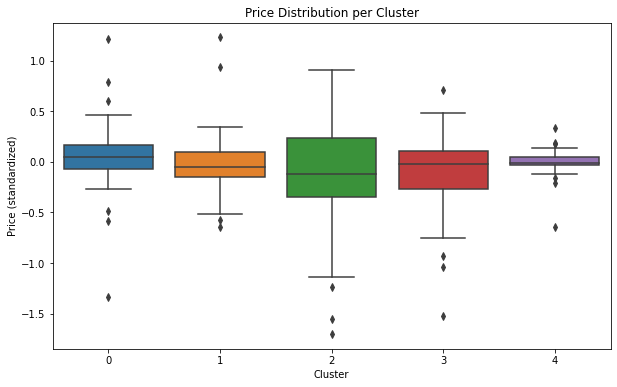

In [89]:

# Lets explore price of each cluster to better understand what differentiates them with a box plot.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='price', data=abnb_grouped)
plt.title('Price Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price (standardized)')
plt.show()


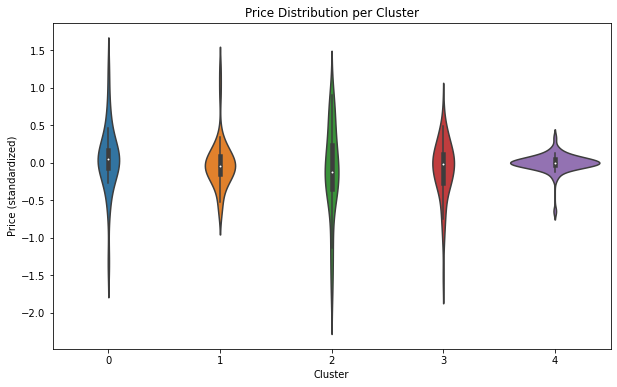

In [90]:
# Lets explore price of each cluster to better understand what differentiates them with a violin plot.
plt.figure(figsize=(10, 6))
sns.violinplot(x='cluster', y='price', data=abnb_grouped)
plt.title('Price Distribution per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price (standardized)')
plt.show()

Violin Plot: A violin plot combines the benefits of a box plot and a kernel density plot, which is a smoothed histogram. It's a great tool to visualize the distribution of numeric data and its probability density

Center Line: The center line in the "body" of the violin represents the median of the data.

Box: The box in the middle of the violin represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). In other words, half of the data points fall within this box.

Violin Shape: The wider sections of the violin plot represent a higher probability that members of the population will take on the given value; the skinnier sections represent a lower probability. The shape or width of the plot at a specific value indicates the concentration or density of data at that value. If the plot is wide, there are many data points at that value. If the plot is narrow, there are fewer data points at that value.

Whiskers: Some violin plots include lines extending from the box indicating variability outside the upper and lower quartiles, hence they are also termed as the 'whiskers'. These whiskers often stretch to 1.5 * IQR from the top/bottom of the box, representing the approximate range of the data distribution. Any data points beyond the whiskers are considered outliers and often indicated with dots or asterisks.

The violin plot displays mirrored density plots, so it's symmetrical along its central vertical axis. This mirrored aspect of the plot allows for a more intuitive comparison of the distribution symmetry between different categories.


Interpretation:

By looking at the violin plot of price across different clusters, we can compare the distribution of price within each cluster. We can identify the median price, see the spread of the price, and identify which clusters have a similar price range and which ones differ.

Cluster 4: This cluster exhibits a broad and thick shape, suggesting that prices within this cluster are quite uniform and tend to be concentrated around a specific value. It has smaller whiskers, indicating fewer price outliers.

Cluster 2: The violin for this cluster is noticeably narrow, indicating a high degree of variability in prices. Its longer whiskers signify the presence of outliers in the price data.

Cluster 1: The width of this cluster's violin is slightly larger than that of Cluster 2, suggesting a slightly higher uniformity in prices than Cluster 2. The presence of a larger upper whisker indicates that there are more outliers in the higher price range.

Cluster 3 & Cluster 0: These clusters have similar shapes, indicating similar price distributions. Their violins are less wide, suggesting less uniformity in prices. The longer whiskers at both ends indicate the presence of outliers at both the lower and upper ends of the price spectrum.

In interpreting these violin plots, the width of the "violin" at any given point is proportional to the estimated kernel density of prices at that level. In other words, a wider segment corresponds to a higher concentration of prices. The "whiskers" of the plot, typically delineate the overall range of the data. Data points that fall beyond these whiskers are often interpreted as outliers.